<a href="https://colab.research.google.com/github/ervinkhoeruman/Ervin/blob/main/Ervin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

 3scene@
'3scene (1)'@
 Classroom/
'Colab Notebooks'/
'ervin (2).pdf'
'Ervin E Khoeruman (1101180037):TT-42-03 (1).pdf'
'Ervin E Khoeruman (1101180037):TT-42-03 (2).pdf'
'Ervin E Khoeruman (1101180037):TT-42-03.pdf'
 Essay1
 essay3
 File.jpg
'Getting started.pdf'
'LA_GELADI2020_7 _1101180037_ERVIN E KHOERUMAN.pdf.pdf'
'LH_GELADI2020_1_1101180037_ERVIN E KHOERUMAN.pdf.pdf'
'LH_GELADI2020_2_1101180037_ERVIN E KHOERUMAN.pdf.pdf'
' LH_GELADI2020_3_1101180037_ERVIN E KHOERUMAN.pdf.pdf'
' LH_GELADI2020_4_1101180037_ERVIN E KHOERUMAN.pdf.pdf'
' LH_GELADI2020_5_1101180037_ERVIN E KHOERUMAN.pdf.pdf'
' LH_GELADI2020_6_1101180037_ERVIN E KHOERUMAN.pdf.pdf'
 manage_lab_result-2007110019.pdf
 satu.jpg


In [ ]:
# import the necessary packages

from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense 
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize

# our list of images and corresponding class labels 
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images

for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale 
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)

  # extract the class label from the file path and update the
  # labels list
  label = imagePath.split(os.path. sep)[-2] 
  labels.append(label)

In [ ]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [ ]:
# encode the labels, converting them from strings to integers 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [ ]:
# perform a troining and testing split, using 75% of the data for 
# training and 25% for evaluation

(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential (
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 1,230,839
Trainable params: 1,230,839
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model using the Adam optimizer
print ("[INFO] training network...") 
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, 
  metrics=["accuracy"])

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 0s 20ms/step - loss: 2.3446 - accuracy: 0.3783 - val_loss: 1.1703 - val_accuracy: 0.4768
Epoch 2/25
23/23 [==============================] - 0s 12ms/step - loss: 1.0218 - accuracy: 0.5696 - val_loss: 1.0442 - val_accuracy: 0.5232
Epoch 3/25
23/23 [==============================] - 0s 11ms/step - loss: 0.8387 - accuracy: 0.6273 - val_loss: 0.8838 - val_accuracy: 0.6456
Epoch 4/25
23/23 [==============================] - 0s 12ms/step - loss: 0.7305 - accuracy: 0.6835 - val_loss: 0.8838 - val_accuracy: 0.6371
Epoch 5/25
23/23 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0.7286 - val_loss: 0.9177 - val_accuracy: 0.5907
Epoch 6/25
23/23 [==============================] - 0s 12ms/step - loss: 0.6473 - accuracy: 0.7257 - val_loss: 1.0586 - val_accuracy: 0.5654
Epoch 7/25
23/23 [==============================] - 0s 12ms/step - loss: 0.8315 - accuracy: 0.6442 - val_loss: 1.0662 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


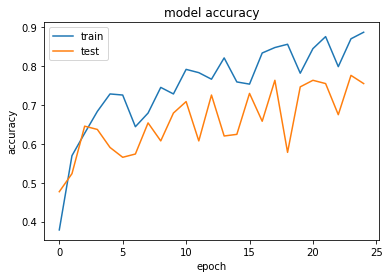

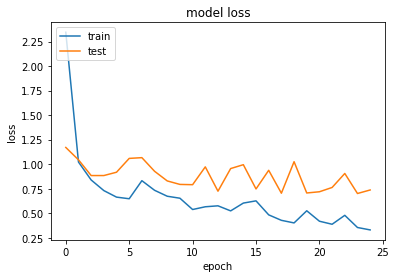

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys()) 
# summarize history for accuracy
plt.plot(H.history['accuracy']) 
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(H.history['loss']) 
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [35]:
# evaluate the network

print("[INFO] evaluating network...") 
predictions = model.predict(testX, batch_size=32) 
print(classification_report(testY.argmax (axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...


TypeError: ignored

In [36]:
model.save('model_scene')

INFO:tensorflow:Assets written to: model_scene/assets


In [37]:
import cv2
import matplotlib.pyplot as plt
image1='satu.jpg'

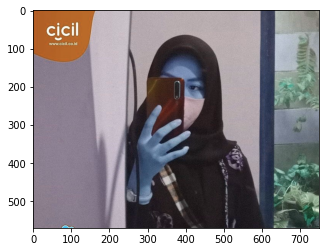

In [38]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [40]:
image_testing = Image.open ('satu.jpg')
image_testing = np.array(image_testing.resize((64,64))) / 255.0
image_testing.shape

(64, 64, 3)

In [41]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [42]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.878583   0.00133305 0.12008388]]
[0]
